In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [69]:
# membaca data vle.csv
vle = pd.read_csv('anonymisedData/vle.csv')
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


## Exploratory Data Analysis

In [70]:
# menampilkan 5 data teratas dari dataset
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [71]:
# menampilkan 5 data terbawah dari dataset
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [72]:
#mengecek apakah ada data missing didalam dataset
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [73]:
# mengisi nilai yang kosong (NaN) menjadi angka 0 pada fitur week_from
vle['week_from'] = vle['week_from'].fillna(0)

In [74]:
# mengisi nilai yang kosong (NaN) menjadi angka 0 pada fitur week_to
vle['week_to'] = vle['week_to'].fillna(0)

In [75]:
# # df['date'] = (np.where(df.date=='?', 0, df.date)).astype(int)
# vle['week_from'] = (np.where(vle.week_from=='NaN', 0, vle.week_from)).astype(int)


In [76]:
# mengecek apakah ada data missing didalam dataset
vle.isna().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [77]:
# vle['week_to'] = (np.where(vle.week_to=='NaN', 0, vle.week_to)).astype(int)

In [78]:
# mengecek duplikasi
vle.duplicated().sum()

0

In [79]:
vle.shape

(6364, 6)

In [80]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,0.0,0.0
1,546712,AAA,2013J,oucontent,0.0,0.0
2,546998,AAA,2013J,resource,0.0,0.0
3,546888,AAA,2013J,url,0.0,0.0
4,547035,AAA,2013J,resource,0.0,0.0


[Text(0, 0, 'resource'),
 Text(1, 0, 'oucontent'),
 Text(2, 0, 'url'),
 Text(3, 0, 'homepage'),
 Text(4, 0, 'subpage'),
 Text(5, 0, 'glossary'),
 Text(6, 0, 'forumng'),
 Text(7, 0, 'oucollaborate'),
 Text(8, 0, 'dataplus'),
 Text(9, 0, 'quiz'),
 Text(10, 0, 'ouelluminate'),
 Text(11, 0, 'sharedsubpage'),
 Text(12, 0, 'questionnaire'),
 Text(13, 0, 'page'),
 Text(14, 0, 'externalquiz'),
 Text(15, 0, 'ouwiki'),
 Text(16, 0, 'dualpane'),
 Text(17, 0, 'repeatactivity'),
 Text(18, 0, 'folder'),
 Text(19, 0, 'htmlactivity')]

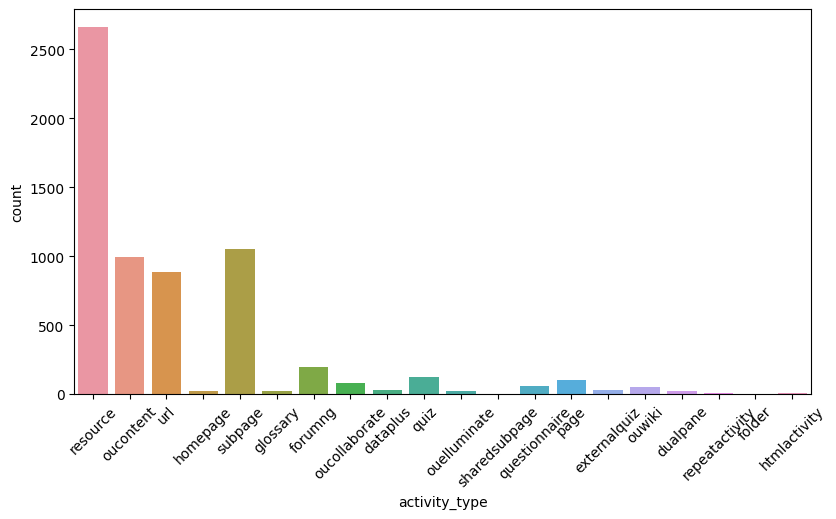

In [81]:
# Membuat plot untuk melihat distribusi dari fitur activity_type dalam dataset
plt.figure(figsize=(9.5,5))
plot = sns.countplot(data=vle, x='activity_type')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

In [82]:
# menjoinkan code module dan code presentation
vle["code_module_presentation"]=vle[['code_module','code_presentation']].agg('-'.join,axis=1)
vleX = vle.drop(columns=['code_module','code_presentation'])
vleX.head()

,id_site,activity_type,week_from,week_to,code_module_presentation
0,546943,resource,0.0,0.0,AAA-2013J
1,546712,oucontent,0.0,0.0,AAA-2013J
2,546998,resource,0.0,0.0,AAA-2013J
3,546888,url,0.0,0.0,AAA-2013J
4,547035,resource,0.0,0.0,AAA-2013J
